# Starter Code for ECE 580 HW2

Demo code for solving LASSO:
$$\arg\min_w \|Y - Xw\|_2^2 + \alpha \|w\|_1$$ 

In [1]:
import torch
# lasso code
from sklearn.linear_model import Lasso

torch.manual_seed(0)
X = torch.randn(4,6)   # 4 samples, 6 features
Y = torch.randn(4)     # Target variable

# Set the regularization strength alpha = 10
myalpha = 0.01

# Fit the Lasso model
lasso = Lasso(alpha=myalpha, fit_intercept=False, max_iter=10000)
lasso.fit(X.numpy(), Y.numpy())

# Display the coefficients
print("Target:", Y)
print("X:", X)
print("w:", lasso.coef_)
print("\033[91mNote: if alpha is unspecified, sklearn.linear_model.Lasso defaults to alpha=1.0 \033[0m")


Target: tensor([0.3704, 1.4565, 0.9398, 0.7748])
X: tensor([[-1.1258, -1.1524, -0.2506, -0.4339,  0.8487,  0.6920],
        [-0.3160, -2.1152,  0.4681, -0.1577,  1.4437,  0.2660],
        [ 0.1665,  0.8744, -0.1435, -0.1116,  0.9318,  1.2590],
        [ 2.0050,  0.0537,  0.6181, -0.4128, -0.8411, -2.3160]])
w: [ 0.68002206 -0.12440565  0.         -0.37820244  0.9276225  -0.        ]
Note: if alpha is unspecified, sklearn.linear_model.Lasso defaults to alpha=1.0 


Possibly handy function for rasterizing images: torch.reshape()

In [2]:
torch.manual_seed(0)
v = torch.randn(4,8)
print('initial shape of v: ', v.shape)
v_vec = v.reshape(32)
print('after reshaping v: ', v_vec.shape)
print('verify that v==v.reshape(4,8).reshape(32): ', (v-v_vec.reshape(4,8)).norm().item())

initial shape of v:  torch.Size([4, 8])
after reshaping v:  torch.Size([32])
verify that v==v.reshape(4,8).reshape(32):  0.0


Code for loading image

Grayscale Image Shape: torch.Size([200, 192])


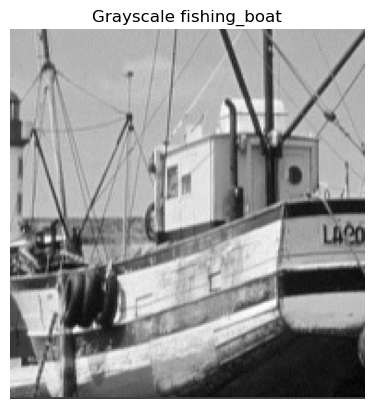

Grayscale image saved to grayscale_fishing_boat.bmp


In [3]:
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
# Load the BMP image using PIL
image_path = "fishing_boat.bmp"  # Replace with your BMP file path
original_image = Image.open(image_path)

# Convert to grayscale using torchvision transforms
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to 1-channel grayscale
    transforms.ToTensor()  # Convert to a PyTorch tensor
])
# Apply the transform
grayscale_image = transform(original_image)[0,:,:]

# Check the shape of the grayscale image tensor
print("Grayscale Image Shape:", grayscale_image.shape)

plt.imshow(grayscale_image, cmap="gray")  # Use cmap="gray" for grayscale display
plt.title("Grayscale fishing_boat")
plt.axis("off")  # Remove axis for better visualization
plt.show()

# Save the grayscale image as a BMP for verification (optional)
save_path = "grayscale_fishing_boat.bmp"
transforms.ToPILImage()(grayscale_image).save(save_path)
print(f"Grayscale image saved to {save_path}")